# Part B : News Article Classification

## Loading dataset using pandas

In [ ]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/dataset/data_news - data_news.csv")
df.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                             keywords  
0                     running-lessons  
1           talking-to-yourself-crazy  
2  crenezumab-alzheimers-disease-drug  
3                     meaningful-life  
4                    green-superfoods

## Checking dataset for null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [ ]:
df[df['keywords'].isnull()]

category                                           headline  \
51     WELLNESS              Hotels Let Guests Sleep In On Sundays   
57     WELLNESS  Auriculotherapy: Penelope Cruz Sports Acupunct...   
59     WELLNESS  Hormone Therapy 'Not Recommended' By Governmen...   
67     WELLNESS                       7 Ways To Fall Asleep Faster   
101    WELLNESS  Doctors Say Changes In Wheat Do Not Explain Ri...   
...         ...                                                ...   
49971    SPORTS  Oakland Athletics Vs. Detroit Tigers: ALDS Gam...   
49980    SPORTS  Tiger Woods On Turning 40 And His Private Stru...   
49982    SPORTS     100 Hottest NFL Cheerleaders | Bleacher Report   
49994    SPORTS  Tiger Woods And Rory McIlroy, Honda Classic Li...   
49998    SPORTS  Why Jake Plummer And Other NFL Players Are Pus...   

                                                   links  \
51     https://www.huffingtonpost.comhttp://www.usato...   
57     https://www.huffingtonpost.comhttp://abcnews.g...   
59     https://www.huffingtonpost.comhttp://www.cnn.c...   
67     https://www.huffingtonpost.comhttp://www.daily...   
101    https://www.huffingtonpost.comhttp://www.npr.o...   
...                                                  ...   
49971  https://www.huffingtonpost.comhttp://bleacherr...   
49980  https://www.huffingtonpost.comhttp://pubx.co/k...   
49982  https://www.huffingtonpost.comhttp://bleacherr...   
49994  https://www.huffingtonpost.comhttp://golfweek....   
49998  https://www.huffingtonpost.comhttp://extras.de...   

                                       short_description keywords  
51     Hotels are encouraging their guests to sleep i...      NaN  
57     The swath of tiny studs in Penelope Cruz's ear...      NaN  
59     The U.S. Preventive Services Task Force says m...      NaN  
67     Can't get enough z's? Try these tips so you ca...      NaN  
101    It's true that about 40 years ago wheat breede...      NaN  
...                                                  ...      ...  
49971  Game 1 of the American League Divisional Serie...      NaN  
49980  Tiger Woods was raised to be a champion. Groom...      NaN  
49982  Bringing you the 100 Hottest Cheerleaders in t...      NaN  
49994  Tiger Woods is looking to springboard off a 5-...      NaN  
49998  They believe CBD could be an alternative to po...      NaN  

[2668 rows x 5 columns]

## The keywords column has alot of null values. But for model training headline, short_description and category columns are enough. Hence, I will be using only those three columns.

## Creating a new object to store only those three columns.

In [ ]:
df_new = df[['category','headline','short_description']].copy()
df_new.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                   short_description  
0  Resting is part of training. I've confirmed wh...  
1  Think of talking to yourself as a tool to coac...  
2  The clock is ticking for the United States to ...  
3  If you want to be busy, keep trying to be perf...  
4  First, the bad news: Soda bread, corned beef a...

# Preprocessing the dataset

## Converiting the columns into lowercase

In [ ]:
df_new['category'] = df_new['category'].str.lower()
df_new['headline'] = df_new['headline'].str.lower()
df_new['short_description'] = df_new['short_description'].str.lower()

df_new.head()

category                                           headline  \
0  wellness              143 miles in 35 days: lessons learned   
1  wellness       talking to yourself: crazy or crazy helpful?   
2  wellness  crenezumab: trial will gauge whether alzheimer...   
3  wellness                     oh, what a difference she made   
4  wellness                                   green superfoods   

                                   short_description  
0  resting is part of training. i've confirmed wh...  
1  think of talking to yourself as a tool to coac...  
2  the clock is ticking for the united states to ...  
3  if you want to be busy, keep trying to be perf...  
4  first, the bad news: soda bread, corned beef a...

## Removing punctuation and stopwords

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_punctuation_and_stopwords(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df_new['headline'] = df_new['headline'].apply(remove_punctuation_and_stopwords)
df_new['short_description'] = df_new['short_description'].apply(remove_punctuation_and_stopwords)

df_new.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


category                                           headline  \
0  wellness                  143 miles 35 days lessons learned   
1  wellness                        talking crazy crazy helpful   
2  wellness  crenezumab trial gauge whether alzheimers drug...   
3  wellness                                 oh difference made   
4  wellness                                   green superfoods   

                                   short_description  
0  resting part training ive confirmed sort alrea...  
1  think talking tool coach challenge narrate exp...  
2  clock ticking united states find cure team wor...  
3  want busy keep trying perfect want happy focus...  
4  first bad news soda bread corned beef beer hig...

## Tokenizing and lemmatizing the dataset

In [ ]:
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df_new['headline'] = df_new['headline'].apply(tokenize_and_lemmatize)
df_new['short_description'] = df_new['short_description'].apply(tokenize_and_lemmatize)

df_new.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


category                                           headline  \
0  wellness                     143 mile 35 day lesson learned   
1  wellness                        talking crazy crazy helpful   
2  wellness  crenezumab trial gauge whether alzheimers drug...   
3  wellness                                 oh difference made   
4  wellness                                   green superfoods   

                                   short_description  
0  resting part training ive confirmed sort alrea...  
1  think talking tool coach challenge narrate exp...  
2  clock ticking united state find cure team work...  
3  want busy keep trying perfect want happy focus...  
4  first bad news soda bread corned beef beer hig...

## Creating a new object to store the cleaned columns

In [ ]:
# prompt: Creating a new object to store the cleaned columns

df_cleaned = df_new.copy()
df_cleaned.head()

category                                           headline  \
0  wellness                     143 mile 35 day lesson learned   
1  wellness                        talking crazy crazy helpful   
2  wellness  crenezumab trial gauge whether alzheimers drug...   
3  wellness                                 oh difference made   
4  wellness                                   green superfoods   

                                   short_description  
0  resting part training ive confirmed sort alrea...  
1  think talking tool coach challenge narrate exp...  
2  clock ticking united state find cure team work...  
3  want busy keep trying perfect want happy focus...  
4  first bad news soda bread corned beef beer hig...

# Performing Exploratory Data Analysis

## Count of articles per category

Count of articles per category:
category
wellness          5000
politics          5000
entertainment     5000
travel            5000
style & beauty    5000
parenting         5000
food & drink      5000
world news        5000
business          5000
sports            5000
Name: count, dtype: int64


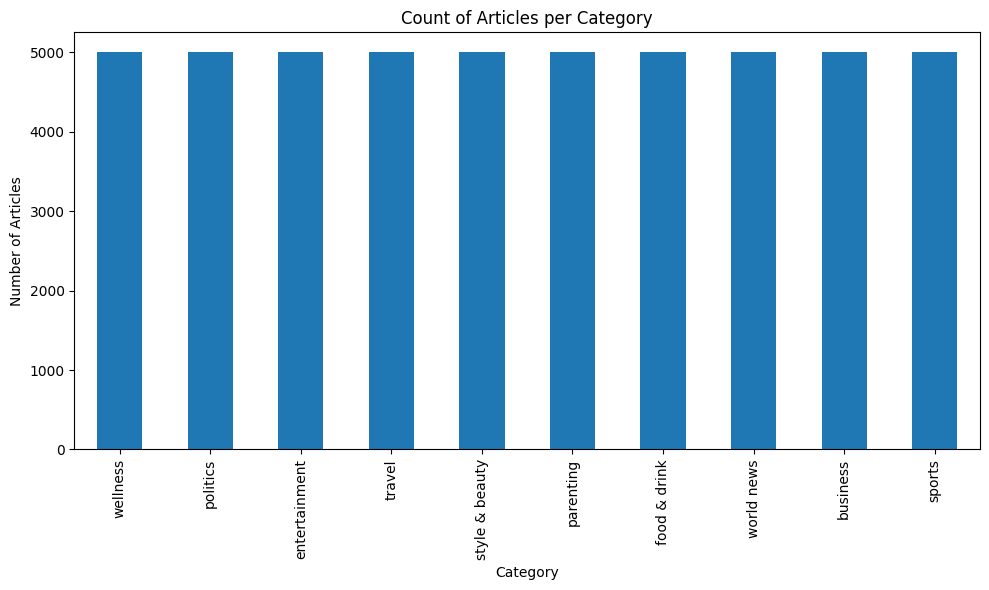

In [ ]:

import matplotlib.pyplot as plt

# Count the number of articles per category
category_counts = df_cleaned['category'].value_counts()

# Print the counts
print("Count of articles per category:")
print(category_counts)

# Optional: Plot the counts for visualization
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Count of Articles per Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Word clouds per category

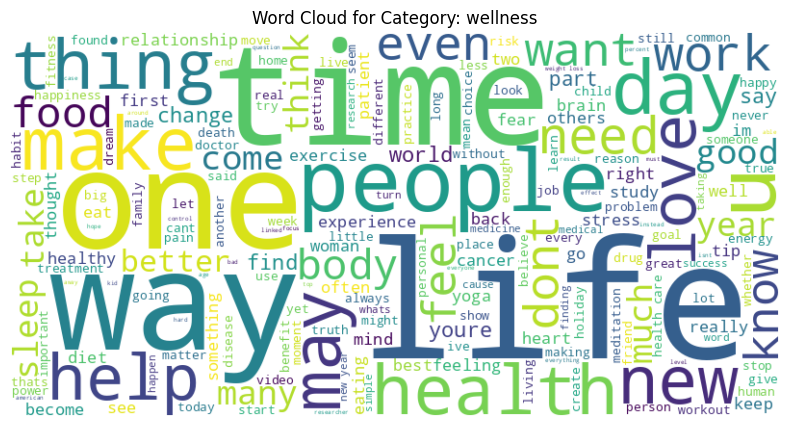

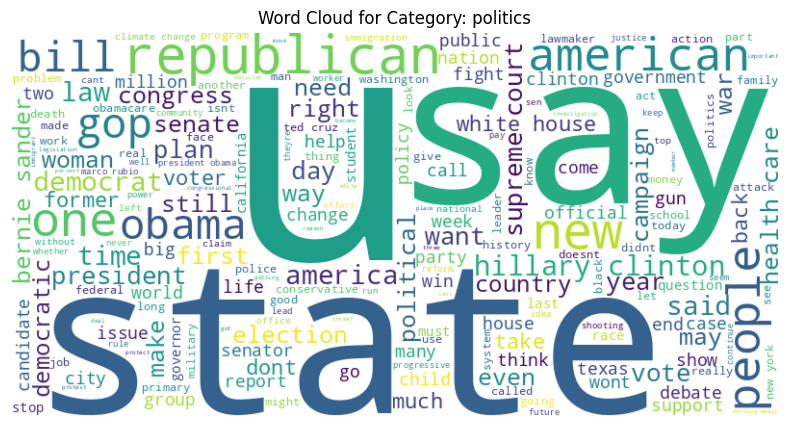

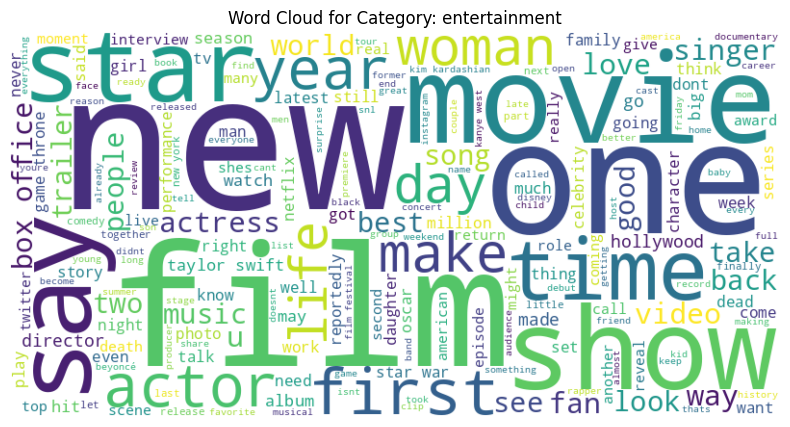

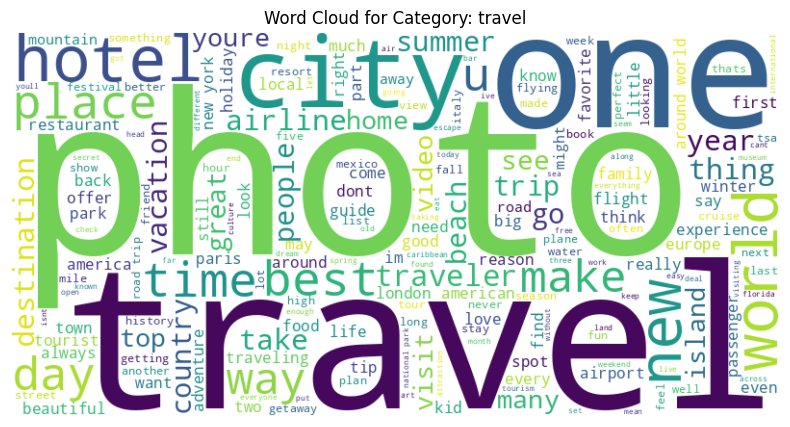

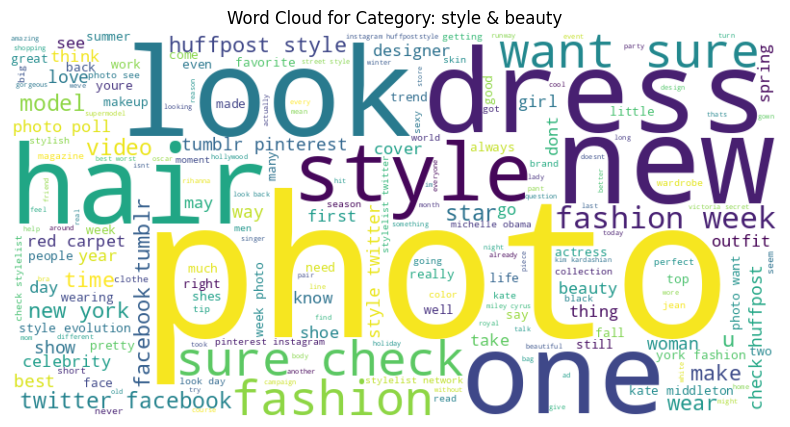

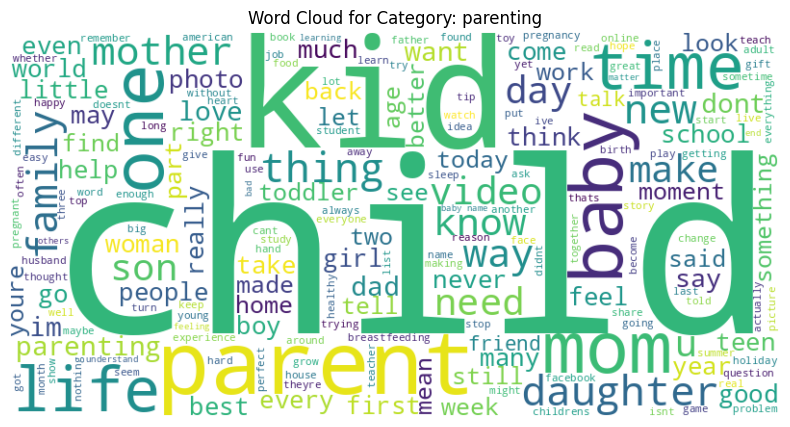

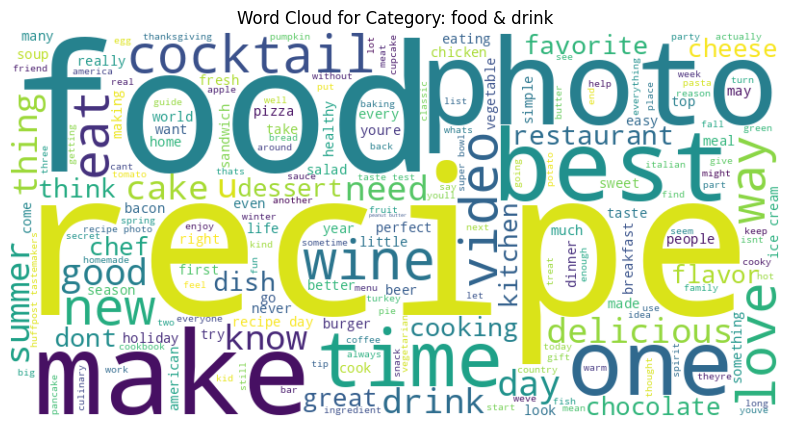

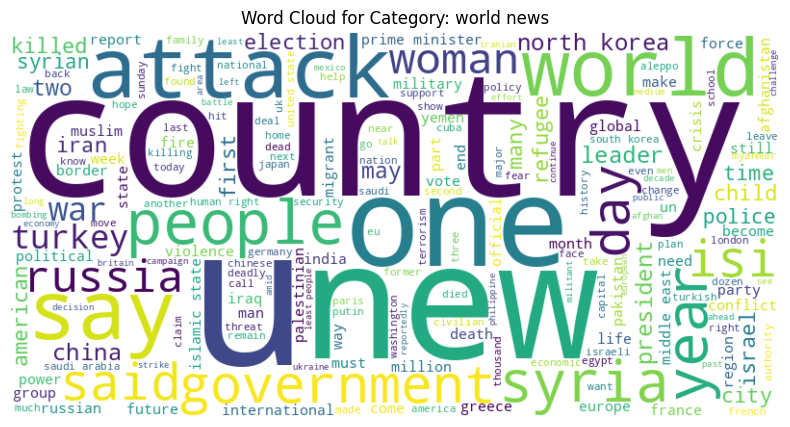

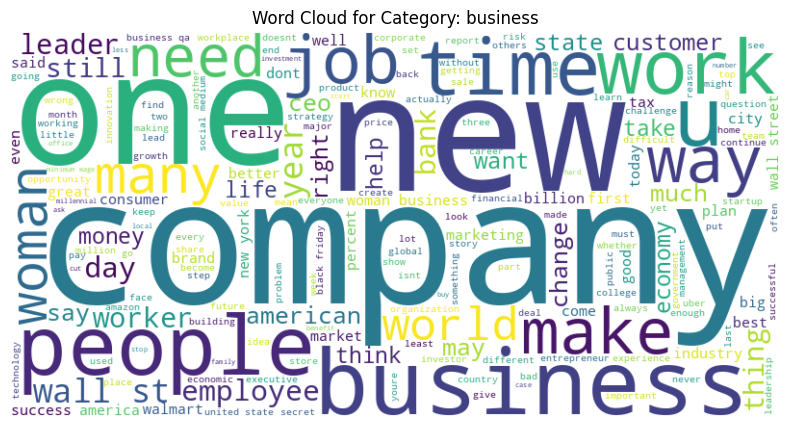

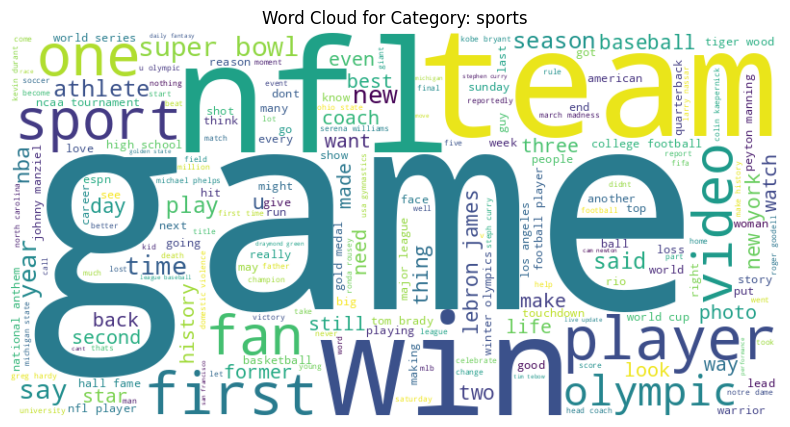

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine headline and short description for each category
df_cleaned['combined_text'] = df_cleaned['headline'] + ' ' + df_cleaned['short_description']

# Get unique categories
categories = df_cleaned['category'].unique()

# Generate and display word clouds for each category
for category in categories:
    category_text = ' '.join(df_cleaned[df_cleaned['category'] == category]['combined_text'])

    if category_text: # Check if there is text for the category
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Category: {category}')
        plt.show()
    else:
        print(f"No text data for category: {category}")

## Length distribution of articles

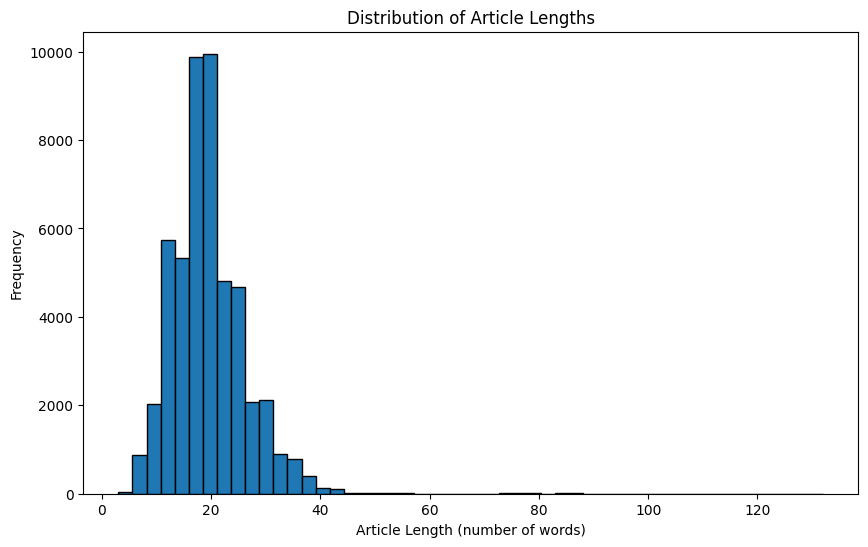

In [ ]:
# Calculate the length of the combined text for each article
df_cleaned['article_length'] = df_cleaned['combined_text'].apply(lambda x: len(x.split()))

# Plot the distribution of article lengths
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['article_length'], bins=50, edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length (number of words)')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

## Using glove for vectorization

In [ ]:
import numpy as np

# Download GloVe embeddings

!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Load the GloVe model
# Choose the desired dimensionality (e.g., glove.6B.100d.txt for 100 dimensions)
glove_file = 'glove.6B.100d.txt'
embeddings_index = {}
with open(glove_file, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f'Found {len(embeddings_index)} word vectors.')

# Function to vectorize text using GloVe
def vectorize_text_glove(text, embeddings_index):
    words = text.split()
    word_vectors = [embeddings_index.get(word) for word in words if word in embeddings_index]
    if not word_vectors:
        return np.zeros(list(embeddings_index.values())[0].shape) # Return a zero vector if no words found
    return np.mean(word_vectors, axis=0)

# Apply GloVe vectorization to the text columns
df_cleaned['headline_vector'] = df_cleaned['headline'].apply(lambda x: vectorize_text_glove(x, embeddings_index))
df_cleaned['short_description_vector'] = df_cleaned['short_description'].apply(lambda x: vectorize_text_glove(x, embeddings_index))

df_cleaned.head()

--2025-06-22 04:35:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-22 04:35:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-22 04:35:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

category                                           headline  \
0  wellness                     143 mile 35 day lesson learned   
1  wellness                        talking crazy crazy helpful   
2  wellness  crenezumab trial gauge whether alzheimers drug...   
3  wellness                                 oh difference made   
4  wellness                                   green superfoods   

                                   short_description  \
0  resting part training ive confirmed sort alrea...   
1  think talking tool coach challenge narrate exp...   
2  clock ticking united state find cure team work...   
3  want busy keep trying perfect want happy focus...   
4  first bad news soda bread corned beef beer hig...   

                                       combined_text  article_length  \
0  143 mile 35 day lesson learned resting part tr...              38   
1  talking crazy crazy helpful think talking tool...              18   
2  crenezumab trial gauge whether alzheimers drug...              21   
3  oh difference made want busy keep trying perfe...              13   
4  green superfoods first bad news soda bread cor...              17   

                                     headline_vector  \
0  [0.12771666, 0.53035164, 0.25222465, 0.0879901...   
1  [0.06141749, 0.02331475, 0.666285, -0.25829998...   
2  [0.132745, 0.097739, -0.102635, 0.17326312, -0...   
3  [-0.20848666, 0.26576665, 0.69984335, -0.18176...   
4  [-0.39564, 0.32467002, -0.050935, -0.4482865, ...   

                            short_description_vector  
0  [0.053636104, 0.19152021, -0.022881879, -0.117...  
1  [0.019228483, 0.23624328, 0.235231, -0.0885464...  
2  [0.06840384, 0.16647084, 0.06098034, -0.197188...  
3  [-0.10856011, 0.163675, 0.23895137, -0.0772967...  
4  [-0.27544698, 0.3176112, 0.17028573, -0.289143...

## Storing only the columns to be trained in a separate object

In [ ]:
df_process = df_cleaned[['category','headline_vector','short_description_vector']].copy()
df_process.shape

(50000, 3)

# Scaling the data for efficient use in training models

In [ ]:
from sklearn.preprocessing import StandardScaler

# Concatenate the headline and short description vectors
X = np.concatenate((np.stack(df_process['headline_vector']), np.stack(df_process['short_description_vector'])), axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

print("Data scaled successfully. Shape of scaled data:", X_scaled.shape)


Data scaled successfully. Shape of scaled data: (50000, 200)


## Label encoding the category column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df_process['category_encoded'] = label_encoder.fit_transform(df_process['category'])

# Display the first few rows with the new encoded column
display(df_process.head())

# Display the mapping of categories to encoded values
print("\nCategory to Encoded Value Mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

category                                    headline_vector  \
0  wellness  [0.12771666, 0.53035164, 0.25222465, 0.0879901...   
1  wellness  [0.06141749, 0.02331475, 0.666285, -0.25829998...   
2  wellness  [0.132745, 0.097739, -0.102635, 0.17326312, -0...   
3  wellness  [-0.20848666, 0.26576665, 0.69984335, -0.18176...   
4  wellness  [-0.39564, 0.32467002, -0.050935, -0.4482865, ...   

                            short_description_vector  category_encoded  
0  [0.053636104, 0.19152021, -0.022881879, -0.117...                 8  
1  [0.019228483, 0.23624328, 0.235231, -0.0885464...                 8  
2  [0.06840384, 0.16647084, 0.06098034, -0.197188...                 8  
3  [-0.10856011, 0.163675, 0.23895137, -0.0772967...                 8  
4  [-0.27544698, 0.3176112, 0.17028573, -0.289143...                 8


Category to Encoded Value Mapping:
business: 0
entertainment: 1
food & drink: 2
parenting: 3
politics: 4
sports: 5
style & beauty: 6
travel: 7
wellness: 8
world news: 9


# Splitting the data into training-validation-test sets

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = X_scaled
y = df_process['category_encoded']

# Split the data into training and the rest (validation + test)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42, stratify=y_rest)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (37500, 200) (37500,)
Validation set shape: (6250, 200) (6250,)
Test set shape: (6250, 200) (6250,)


# Training different models like logistic regression, Naive bayes, SVM, Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42,max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val) # Evaluate on the validation set

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print("\n" + "="*50 + "\n")

# Print a summary of the validation results
print("Summary of Validation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 20)

Training Logistic Regression...


Training Naive Bayes...


Training SVM...


Training Random Forest...


Summary of Validation Results:
Logistic Regression:
  Accuracy: 0.7274
  Precision: 0.7276
  Recall: 0.7274
  F1 Score: 0.7270
--------------------
Naive Bayes:
  Accuracy: 0.6499
  Precision: 0.6589
  Recall: 0.6499
  F1 Score: 0.6524
--------------------
SVM:
  Accuracy: 0.7883
  Precision: 0.7889
  Recall: 0.7883
  F1 Score: 0.7880
--------------------
Random Forest:
  Accuracy: 0.7326
  Precision: 0.7336
  Recall: 0.7326
  F1 Score: 0.7326
--------------------


## Cross-validating

In [ ]:

import numpy as np
from sklearn.model_selection import cross_val_score

# Perform cross-validation for each model
cv_results = {}

for name, model in models.items():
    print(f"Performing cross-validation for {name}...")
    # Use the combined training and validation data for cross-validation
    X_train_val = np.concatenate((X_train, X_val), axis=0)
    y_train_val = np.concatenate((y_train, y_val), axis=0)

    # Perform 5-fold cross-validation (you can adjust the number of folds)
    scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='accuracy')

    cv_results[name] = {
        'Mean Accuracy': scores.mean(),
        'Std Deviation': scores.std()
    }

    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print("-" * 20)

# Print a summary of the cross-validation results
print("\nSummary of Cross-Validation Results:")
for name, metrics in cv_results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 20)


Performing cross-validation for Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.7333 (+/- 0.0048)
--------------------
Performing cross-validation for Naive Bayes...
Naive Bayes Cross-Validation Accuracy: 0.6502 (+/- 0.0033)
--------------------
Performing cross-validation for SVM...
SVM Cross-Validation Accuracy: 0.7874 (+/- 0.0047)
--------------------
Performing cross-validation for Random Forest...
Random Forest Cross-Validation Accuracy: 0.7315 (+/- 0.0031)
--------------------

Summary of Cross-Validation Results:
Logistic Regression:
  Mean Accuracy: 0.7333
  Std Deviation: 0.0048
--------------------
Naive Bayes:
  Mean Accuracy: 0.6502
  Std Deviation: 0.0033
--------------------
SVM:
  Mean Accuracy: 0.7874
  Std Deviation: 0.0047
--------------------
Random Forest:
  Mean Accuracy: 0.7315
  Std Deviation: 0.0031
--------------------


## Hypertuning SVM model as its the best performing model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [ 1,10],
    'gamma': ['scale','auto'],
    'kernel': ['rbf']
}

# Initialize GridSearchCV with the SVM model and parameter grid
# Using the combined training and validation data for hyperparameter tuning
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=3, scoring='accuracy')

# Fit the grid search to the data
print("Performing Grid Search for SVM Hyperparameter Tuning...")
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters found
print("\nBest parameters found by Grid Search:")
print(grid_search.best_params_)

# Print the best score achieved
print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

# Get the best model
best_svm_model = grid_search.best_estimator_


Performing Grid Search for SVM Hyperparameter Tuning...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 4.4min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 4.4min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time= 4.3min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 4.3min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 4.2min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time= 4.3min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time= 4.8min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time= 4.8min
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time= 4.8min
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time= 4.9min
[CV] END .......................C=10, gamma=auto, kernel=rbf; total time= 

## Testing the hypertuned SVM model on test set.

In [ ]:
print("Evaluating the best SVM model on the test set...")
y_test_pred = best_svm_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nTest Set Performance of the Best SVM Model:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1 Score: {test_f1:.4f}")

# Optional: Print classification report on the test set
print("\nClassification Report for the Best SVM Model on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluating the best SVM model on the test set...

Test Set Performance of the Best SVM Model:
  Accuracy: 0.8014
  Precision: 0.8015
  Recall: 0.8014
  F1 Score: 0.8010

Classification Report for the Best SVM Model on Test Set:
                precision    recall  f1-score   support

      business       0.80      0.86      0.83       625
 entertainment       0.72      0.76      0.74       625
  food & drink       0.82      0.85      0.84       625
     parenting       0.73      0.74      0.74       625
      politics       0.77      0.73      0.75       625
        sports       0.89      0.94      0.92       625
style & beauty       0.87      0.82      0.84       625
        travel       0.83      0.80      0.81       625
      wellness       0.77      0.71      0.74       625
    world news       0.82      0.80      0.81       625

      accuracy                           0.80      6250
     macro avg       0.80      0.80      0.80      6250
  weighted avg       0.80      0.80      0

## Visualizing Model Performance

### Confusion Matrix

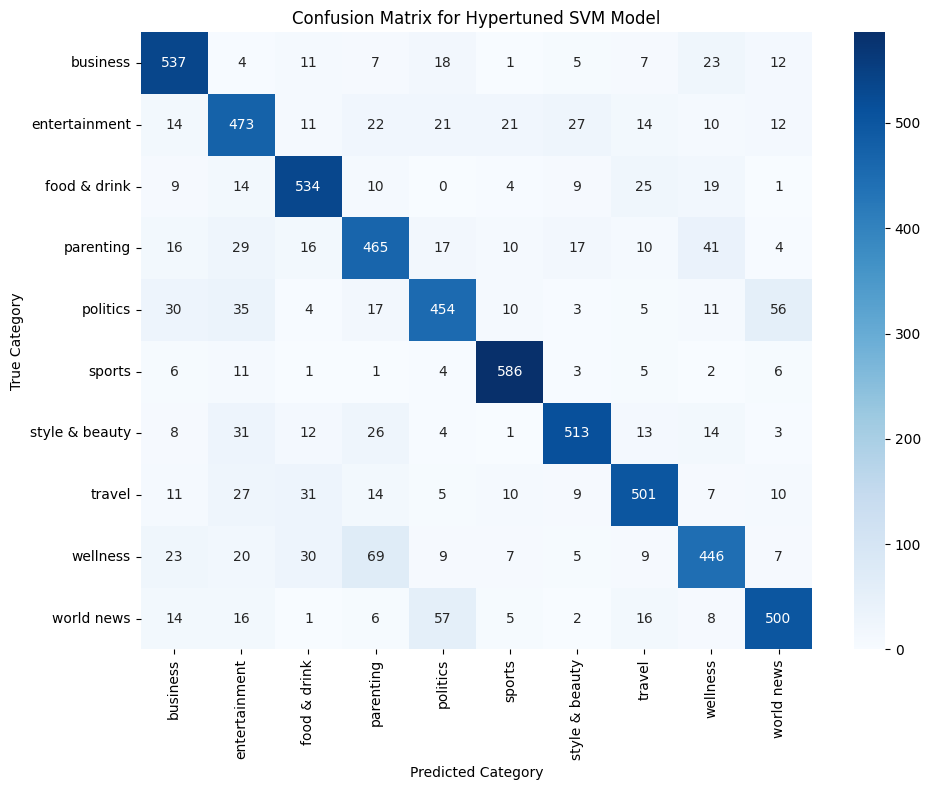

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.title('Confusion Matrix for Hypertuned SVM Model')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### ROC Curve (One-vs.-Rest)

/tmp/ipython-input-23-1529801512.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


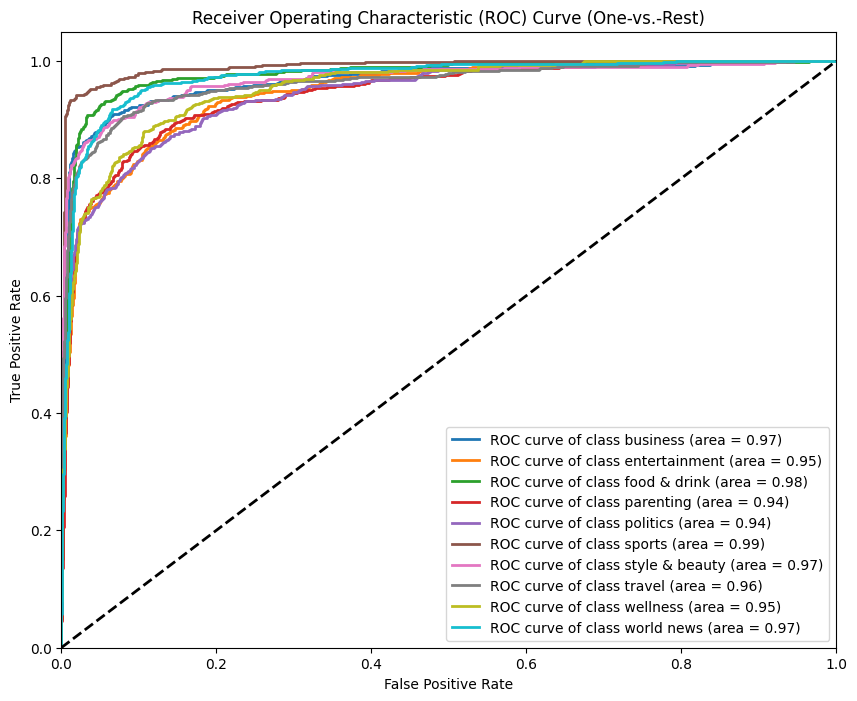

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
n_classes = y_test_bin.shape[1]


try:
    y_score = best_svm_model.decision_function(X_test)
except AttributeError:
    print("Model does not have decision_function. ROC curve cannot be plotted without decision_function or predict_proba.")
    y_score = None


if y_score is not None:
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = plt.cm.get_cmap('tab10', n_classes)
    for i, color in zip(range(n_classes), colors.colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (One-vs.-Rest)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Cannot plot ROC curve as decision_function or predict_proba is not available in the model.")

### Saving the trained model, scaler, and label encoder

In [ ]:
import joblib

# Define file paths for saving the objects
model_filename = 'best_svm_model.pkl'
scaler_filename = 'scaler.pkl'
label_encoder_filename = 'label_encoder.pkl'

# Save the trained model
joblib.dump(best_svm_model, model_filename)
print(f"Trained model saved to {model_filename}")

# Save the fitted scaler
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

# Save the fitted label encoder
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label encoder saved to {label_encoder_filename}")

Trained model saved to best_svm_model.pkl
Scaler saved to scaler.pkl
Label encoder saved to label_encoder.pkl


### Loading the saved model, scaler, and label encoder

In [ ]:
import joblib

# Define file paths for loading the objects
model_filename = 'best_svm_model.pkl'
scaler_filename = 'scaler.pkl'
label_encoder_filename = 'label_encoder.pkl'

# Load the trained model
loaded_model = joblib.load(model_filename)
print(f"Trained model loaded from {model_filename}")

# Load the fitted scaler
loaded_scaler = joblib.load(scaler_filename)
print(f"Scaler loaded from {scaler_filename}")

# Load the fitted label encoder
loaded_label_encoder = joblib.load(label_encoder_filename)
print(f"Label encoder loaded from {label_encoder_filename}")

# Now you can use loaded_model, loaded_scaler, and loaded_label_encoder
# to make predictions on new data without retraining.

Trained model loaded from best_svm_model.pkl
Scaler loaded from scaler.pkl
Label encoder loaded from label_encoder.pkl


# A fuction to input new data and tell its category

In [ ]:
glove_file = 'glove.6B.100d.txt'
embeddings_index = {}
try:
    with open(glove_file, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Loaded {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print(f"Error: {glove_file} not found. Please ensure GloVe embeddings are available.")

    embeddings_index = {}


# Define the preprocessing functions
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def remove_punctuation_and_stopwords(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def vectorize_text_glove(text, embeddings_index):
    words = text.split()
    word_vectors = [embeddings_index.get(word) for word in words if word in embeddings_index]
    if not word_vectors and embeddings_index: # Check if embeddings_index is not empty
        # Return a zero vector with the correct dimension
        return np.zeros(list(embeddings_index.values())[0].shape)
    elif not word_vectors and not embeddings_index:
         # Handle the case where embeddings were not loaded
         print("Warning: GloVe embeddings not loaded. Cannot vectorize text.")
         return None # Or return a vector of zeros if a fixed size is expected
    return np.mean(word_vectors, axis=0)


def predict_news_category(csv_file_path, required_columns, model, scaler, label_encoder, embeddings_index):

    try:
        # Read the new CSV file
        new_df = pd.read_csv(csv_file_path)
        print(f"Successfully loaded {csv_file_path}")

        # Check if required columns exist
        if not all(col in new_df.columns for col in required_columns):
            missing_cols = [col for col in required_columns if col not in new_df.columns]
            print(f"Error: Missing required columns in the CSV file: {missing_cols}")
            return None

        # Extract relevant columns
        df_predict = new_df[required_columns].copy()
        print("Extracted relevant columns.")
        display(df_predict.head())

        # Preprocessing (same steps as training)
        print("Starting preprocessing...")
        for col in required_columns:
             df_predict[col] = df_predict[col].astype(str).str.lower() # Ensure columns are strings and lowercase

        # Apply punctuation and stopword removal
        for col in required_columns:
            df_predict[col] = df_predict[col].apply(remove_punctuation_and_stopwords)

        # Apply tokenization and lemmatization
        for col in required_columns:
             df_predict[col] = df_predict[col].apply(tokenize_and_lemmatize)

        print("Preprocessing complete.")
        display(df_predict.head())

        # Feature Engineering (Vectorization)
        print("Starting vectorization...")
        headline_vectors = df_predict['headline'].apply(lambda x: vectorize_text_glove(x, embeddings_index))
        short_description_vectors = df_predict['short_description'].apply(lambda x: vectorize_text_glove(x, embeddings_index))

        # Check if vectorization was successful and returned valid vectors
        if headline_vectors.isnull().any() or short_description_vectors.isnull().any():
             print("Error during vectorization. Some text could not be vectorized.")
             return None

        # Concatenate the vectors
        X_new = np.concatenate((np.stack(headline_vectors), np.stack(short_description_vectors)), axis=1)
        print(f"Vectorization complete. Shape of new data vectors: {X_new.shape}")


        # Scaling the data
        print("Scaling new data...")
        X_new_scaled = scaler.transform(X_new)
        print("Scaling complete.")


        # Make predictions
        print("Making predictions...")
        predictions_encoded = model.predict(X_new_scaled)

        # Decode the predictions back to original categories
        predictions_category = label_encoder.inverse_transform(predictions_encoded)
        print("Predictions complete.")

        # Add predictions to the original dataframe
        new_df['predicted_category_encoded'] = predictions_encoded # Optional: add encoded prediction
        new_df['predicted_category'] = predictions_category

        return new_df

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


# Define the required columns for prediction
REQUIRED_PREDICT_COLUMNS = ['headline', 'short_description']


new_csv_file_path = '/content/check.csv'


if 'best_svm_model' in locals() and 'scaler' in locals() and 'label_encoder' in locals() and embeddings_index:
    # Call the prediction function
    prediction_results_df = predict_news_category(
        new_csv_file_path,
        REQUIRED_PREDICT_COLUMNS,
        best_svm_model,
        scaler,
        label_encoder,
        embeddings_index
    )

    # Display the results
    if prediction_results_df is not None:
        print("\n--- Prediction Results ---")
        display(prediction_results_df[['headline', 'short_description', 'predicted_category']].head())

    else:
        print("\nPrediction failed.")
else:
    print("Required model, scaler, label encoder, or embeddings not found. Please ensure the training steps were completed successfully.")

Loaded 400000 word vectors.
Successfully loaded /content/check.csv
Extracted relevant columns.


headline  \
0              143 Miles in 35 Days: Lessons Learned   
1       Talking to Yourself: Crazy or Crazy Helpful?   
2  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3                     Oh, What a Difference She Made   
4                                   Green Superfoods   

                                   short_description  
0  Resting is part of training. I've confirmed wh...  
1  Think of talking to yourself as a tool to coac...  
2  The clock is ticking for the United States to ...  
3  If you want to be busy, keep trying to be perf...  
4  First, the bad news: Soda bread, corned beef a...

Starting preprocessing...
Preprocessing complete.


headline  \
0                     143 mile 35 day lesson learned   
1                        talking crazy crazy helpful   
2  crenezumab trial gauge whether alzheimers drug...   
3                                 oh difference made   
4                                   green superfoods   

                                   short_description  
0  resting part training ive confirmed sort alrea...  
1  think talking tool coach challenge narrate exp...  
2  clock ticking united state find cure team work...  
3  want busy keep trying perfect want happy focus...  
4  first bad news soda bread corned beef beer hig...

Starting vectorization...
Vectorization complete. Shape of new data vectors: (10, 200)
Scaling new data...
Scaling complete.
Making predictions...
Predictions complete.

--- Prediction Results ---


headline  \
0              143 Miles in 35 Days: Lessons Learned   
1       Talking to Yourself: Crazy or Crazy Helpful?   
2  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3                     Oh, What a Difference She Made   
4                                   Green Superfoods   

                                   short_description predicted_category  
0  Resting is part of training. I've confirmed wh...           wellness  
1  Think of talking to yourself as a tool to coac...           wellness  
2  The clock is ticking for the United States to ...           wellness  
3  If you want to be busy, keep trying to be perf...          parenting  
4  First, the bad news: Soda bread, corned beef a...       food & drink

# Video Link

https://drive.google.com/file/d/11vGqshOOKyZ7FFruvWeVF-4isrpUQfep/view?usp=sharing